## Course 3 - Comparing Genes, Proteins, and Genomes 

<div class="alert-success">
    <h3> The course covers following topics: </h3></br>
  3.1. Global sequence alignment using DAGs (the Manhattan problem)</br> 
  3.2. Local alignment
  3.3. Application - Edit distance, Fitting alignment, Overlap alignment</br>   
  3.4. Linear-space sequence alignment (the middle edge problem)</br>   
  3.5. Multiple sequence alignment using DAGs</br> 
</div>

### 3.1. Global sequence alignment using DAGs (the Manhattan problem)
To align a sequence $S_2$ with length $m_1$ to a reference $S_2$ with length $m_1$, we construct a $m_1 \times m_2$ rectangular grid (which has $(m_1+1) \times (m_2+1$) nodes). In this grid, nodes are connected by three types of edges: &#8594;, &#8595;, &#8600;. The problem of sequence alignment is equivalent to constructing a path that traverses from the top left corner $(0,0)$ to the bottom right corner $(m_1, m_2)$. A downward arrow represents a deletion, a rightward arrow represents an insertion, and a diagnoal arrow represents a match/mismatch.

To find an optimal alignment, we can define edge weights corresponding to insertion, deletion, match, and mismatch. Our scoring function is the total weight of a path, and finding the optimal alignment corresponds to finding the path that maximizes this scoring function (i.e. finding the longest path.)

#### Finding the longest path in a DAG
In order to find the longest path in an acylical DAG, we first find the *topolocial ordering* of all the nodes. In this ordering, all the predecessors of a given node appears before it. Once we have the correct topological ordering, we can use dynamic programming to sequentially calculate the maximal path length to each node following the topological ordering. 

#### Implementation of the longest path in the Manhattan Tourist Problem.

* Input: Integers n and m, followed by an n × (m + 1) matrix Down and an (n + 1) × m matrix Right. The two matrices are separated by the "-" symbol.  
* Output: The length of a longest path from source (0, 0) to sink (n, m) in the rectangular grid whose edges are defined by the matrices Down and Right.


In [1]:
import numpy as np

def LongestPath(n, m, Down, Right):
    Score = np.empty((n+1,m+1))
    Score[0,0] = 0
    for j in range(1,n+1):
        Score[j,0] = Score[j-1,0] + Down[j-1,0]
    for j in range(1,m+1):
        Score[0,j] = Score[0,j-1] + Right[0,j-1]
    for i in range(1,n+1):
        for j in range(1,m+1):
            Score[i,j] = max(Score[i-1,j]+Down[i-1,j], Score[i,j-1]+Right[i,j-1])  
    return Score[n,m]

In [21]:
# Read the input and calculate the max score

fnm = 'Course3_Data/Input_Manhattan_Tourist.txt'
with open(fnm, 'r', encoding='utf-8') as file:
    n, m = (int(s) for s in file.readline().strip().split())
    Down = np.zeros((n, m+1))
    Right = np.zeros((n+1, m))
    for i in range(n): #Read the Down marix
        Down[i] = [int(s) for s in file.readline().strip().split()]
    file.readline()
    for i in range(n+1): #Read the Right matrix
        Right[i] = [int(s) for s in file.readline().strip().split()]

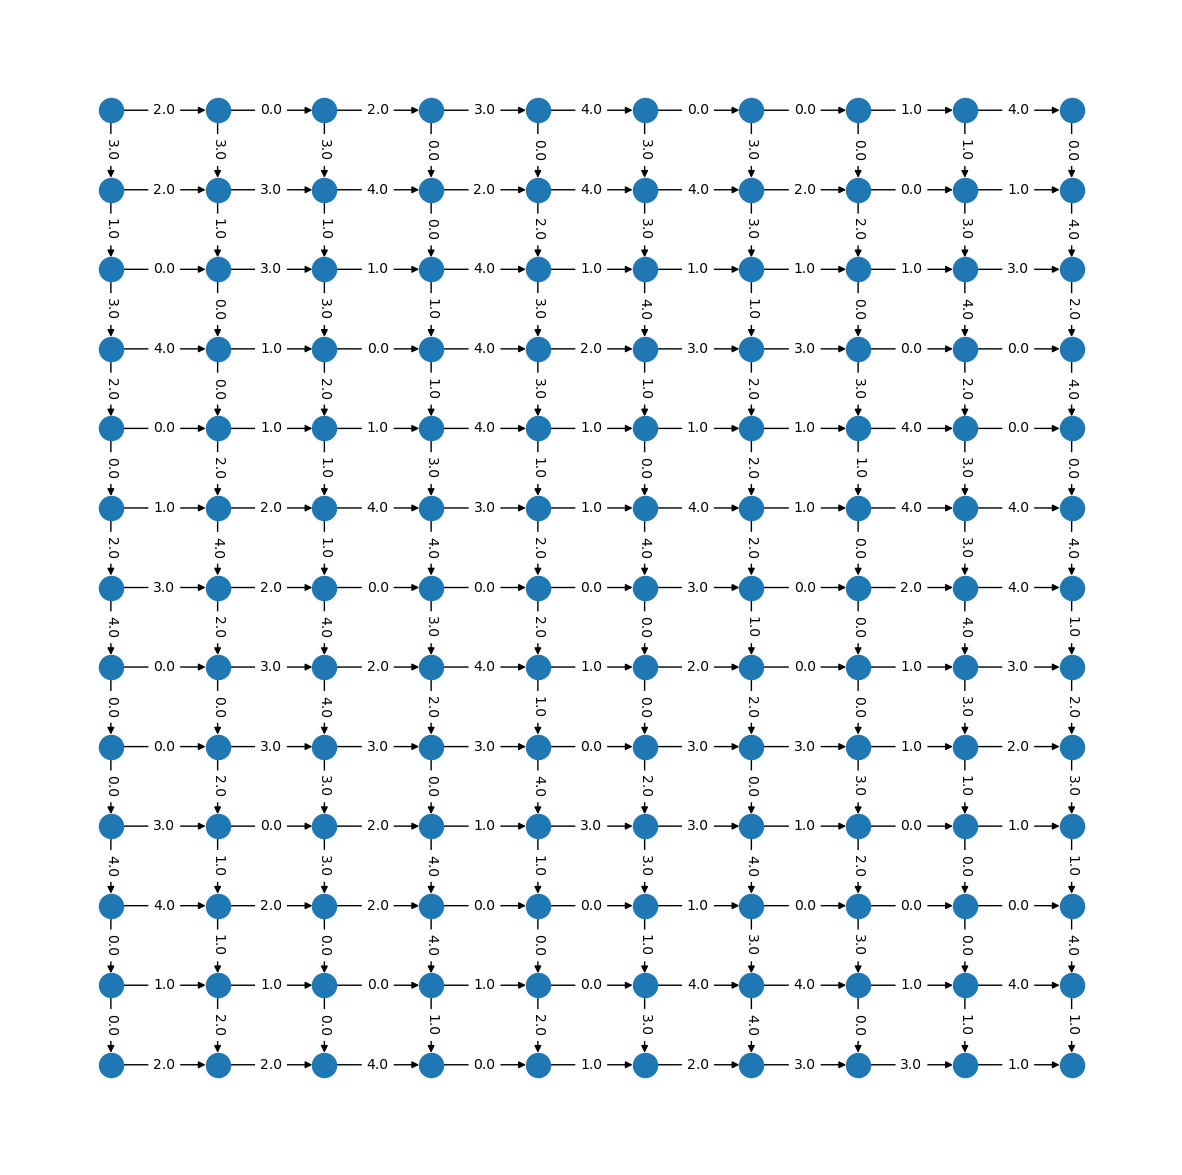

Score for longest path = 62.0


In [22]:
# Visualize
import networkx as nx
import matplotlib.pyplot as plt

# create the graph object
G = nx.DiGraph()

# add nodes to the graph
for i in range(n+1):
    for j in range(m+1):
        G.add_node((i, j))

# add down edges to the graph
for i in range(n):
    for j in range(m+1):
        G.add_edge((i, j), (i+1, j), weight=Down[i][j])

# add right edges to the graph
for i in range(n+1):
    for j in range(m):
        G.add_edge((i, j), (i, j+1), weight=Right[i][j])

# create the layout for the graph
pos = {(i, j): (j, -i) for i in range(n+1) for j in range(m+1)}

# draw the nodes and edges
fig, ax = plt.subplots(1,1,figsize=(15,15))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# show the plot
plt.axis('off')
plt.show()
print(f'Score for longest path = {LongestPath(n,m,Down,Right)}')

#### Backtracking
In order to find the actual path that leads to the maximal length, we need to implement a backtracking algorithm that finds this maximal path.

In [ ]:
def BackTrack(s,t):
    backtrack = np.empty((len(s)+1, len(t)+1))
    Score = np.empty((len(s)+1, len(t)+1))
    for i in range(len(s)+1):
        Score[i,0] = 0
    for j in range(len(t)+1):
        Score[0,j] = 0
    for i in range(1,len(s)+1):
        for j in range(1,len(t)+1):
            Score[i,j] = max(Score[i-1,j], Score[i,j-1], Score[i-1,j-1]+(s[i-1]==t[j-1]))
            if Score[i,j] == Score[i,j-1]:
                backtrack[i,j] = ord('e') #east
            elif Score[i,j] == Score[i-1,j]:
                backtrack[i,j] = ord('s') #south
            else:
                backtrack[i,j] = ord('d') #diagonal 
    return backtrack

#### Longest common substring

In [3]:
def OutputLCS(backtrack, v, i, j):
    if i==0 or j==0:
        return ''
    if backtrack[i,j] == ord('e'):
        return OutputLCS(backtrack, v, i, j-1)
    elif backtrack[i,j] == ord('s'):
        return OutputLCS(backtrack, v, i-1, j)
    else:
        return OutputLCS(backtrack, v, i-1, j-1) + v[i-1]

#### Finding the longest path in DAG

In [2]:
def LongestPathDAG(start, end, topoDag):
    nodes = topoDag[0]
    adjacency = topoDag[1]
    Score = np.zeros(len(nodes))
    backtrack = dict()
    n = nodes.index(start)
    m = nodes.index(end)
    for i in range(n+1,m+1):
        parents = [j for j in range(i) if adjacency[nodes[j],nodes[i]]>=0]
        if len(parents)==0:
            Score[i] = -np.infty
        else:
            candidates = [Score[j]+adjacency[nodes[j],nodes[i]] for j in parents]
            Score[i] = max(candidates)
            maxparent = parents[candidates.index(Score[i])]
            backtrack[nodes[i]] = nodes[maxparent]
    weight = Score[m]
    path = [nodes[m]]
    while path[-1]!=start:
        path.append(backtrack[path[-1]])
    path.reverse()
    return weight, path

In [52]:
fnm = 'Course3_data/Input_LongestPath.txt'
with open(fnm, 'r', encoding='utf-8') as file:
    nodes = []
    edges = []
    start = int(file.readline().strip())
    end = int(file.readline().strip())
    line = file.readline()
    while line:
        line = line.split('->')
        node = int(line[0])
        neighbor = [int(s) for s in line[1].split(':')]
        if node not in nodes:
            nodes.append(node)
        edges.append([node]+neighbor)
        line = file.readline()
    for edge in edges:
        if edge[1] not in nodes:
            nodes.append(edge[1])
    nodes.sort()
    adjacency = np.zeros((end+1,end+1))-1
    for edge in edges:
        adjacency[edge[0],edge[1]] = edge[2]
    topoDag = [nodes, adjacency]
    weight, path = LongestPathDAG(start, end, topoDag)
    print(f'Max weight={weight:.1f}')
    print('Path: ','->'.join([str(s) for s in path]))

Max weight=173.0
Path:  0->1->2->3->4->5->9->10->16->18->25->26->29->40->45->48->49


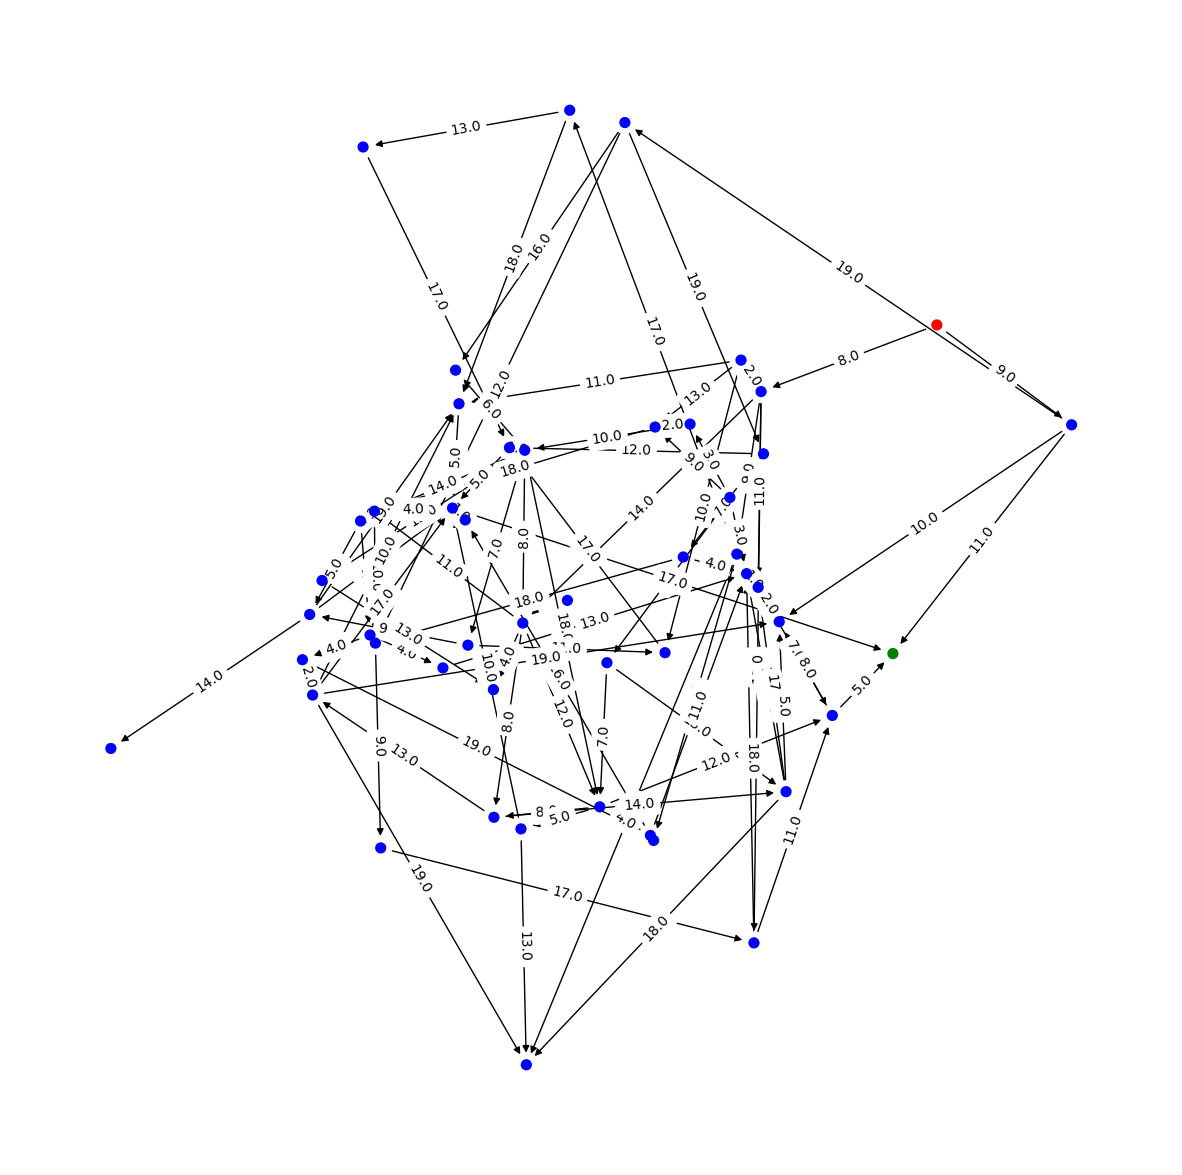

In [53]:
# Visualization of the graph 
G = nx.DiGraph()
color_map = []

for node in nodes:
    G.add_node(node)
    if node==start:
        color_map.append('red')
    elif node==end:
        color_map.append('green')
    else: 
        color_map.append('blue')       
    
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if adjacency[i][j]>0:
            G.add_edge(nodes[i], nodes[j], weight=adjacency[i][j])

fig, ax = plt.subplots(1,1,figsize=(15,15))            
pos = nx.kamada_kawai_layout(G)

# draw the nodes and edges
nx.draw_networkx_nodes(G, pos=pos, node_size=50, node_color=color_map)
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# show the plot
plt.axis('off')
plt.show()

#### Global alignment problem